## Step 1: Import Necessary Libraries

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

## Step 2: Load Processed Data

In [2]:
# Load the processed dataset from previous exercise

DATA_PATH = "../data/processed/nyc_citibike_2022_processed.csv"
print(f"Loading data from: {DATA_PATH}")

df = pd.read_csv(DATA_PATH, low_memory=False)

print(f"Dataset loaded: {len(df):,} rows, {len(df.columns)} columns")

# Display basic info
print("\nDataset info:")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Columns: {list(df.columns)}")

Loading data from: ../data/processed/nyc_citibike_2022_processed.csv
Dataset loaded: 29,838,806 rows, 17 columns

Dataset info:
Date range: 2021-01-30 to 2022-12-31
Columns: ['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual', '_source_file', 'date', 'avg_temp_c', 'avg_temp_f']


## Step 3: Create Temperature Line Plot (Pandas Method)

Weather data prepared: 402 days


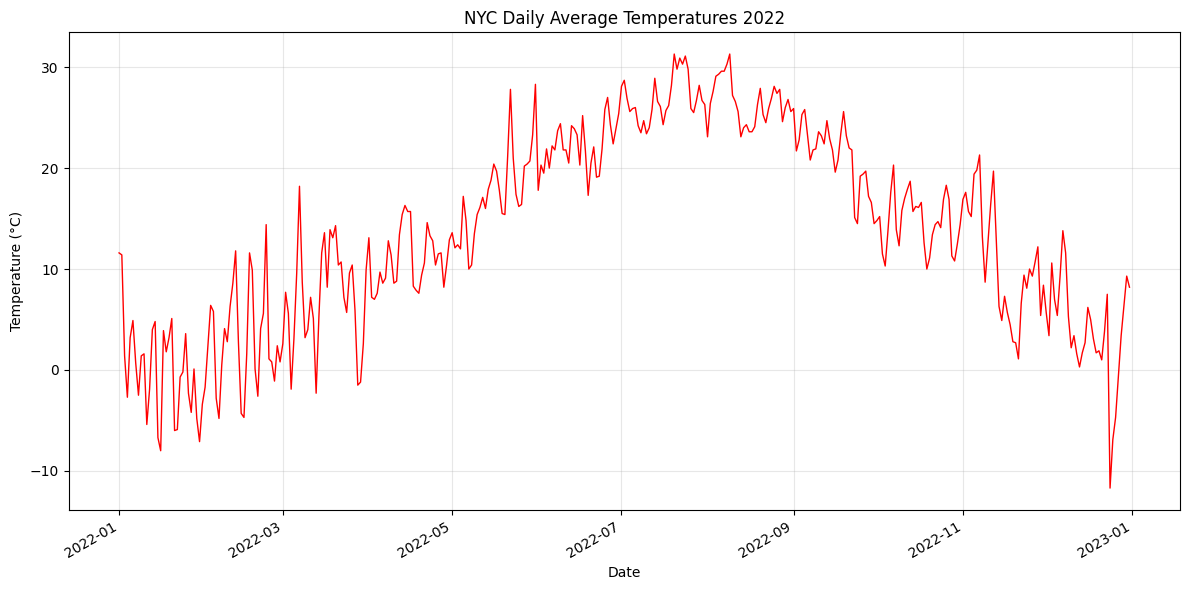

In [3]:
# Create a line plot of temperatures for 2022 using pandas plotting function

# First, prepare the weather data
weather_df = df[['date', 'avg_temp_c']].drop_duplicates().sort_values('date')
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df = weather_df.set_index('date')

print(f"Weather data prepared: {len(weather_df)} days")

# Create line plot using pandas plotting function
plt.figure(figsize=(12, 6))
weather_df['avg_temp_c'].plot(title='NYC Daily Average Temperatures 2022', 
                              color='red', 
                              linewidth=1)
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('NYC Daily Average Temperatures 2022')
plt.show()

## Step 4: Create Trip Counts and Merge with Weather Data

In [4]:
# Create a column with count of trips per day and merge with weather dataframe

# Count trips per day
trips_per_day = df.groupby('date').size().reset_index(name='daily_trips')
trips_per_day['date'] = pd.to_datetime(trips_per_day['date'])

print(f"Trips per day calculated: {len(trips_per_day)} days")
print(f"Average daily trips: {trips_per_day['daily_trips'].mean():.0f}")

# Merge with weather data
merged_data = weather_df.reset_index().merge(trips_per_day, on='date', how='inner')
merged_data = merged_data.set_index('date')

print(f"Merged dataset: {len(merged_data)} days")
print("\nFirst 5 rows of merged data:")
display(merged_data.head())

Trips per day calculated: 402 days
Average daily trips: 74226
Merged dataset: 402 days

First 5 rows of merged data:


,avg_temp_c,daily_trips
date,,
2021-01-30,NaN,1
2021-02-15,NaN,1
2021-03-11,NaN,1
2021-03-14,NaN,1
2021-03-31,NaN,1


Demonstrating Procedural/Functional Approach:


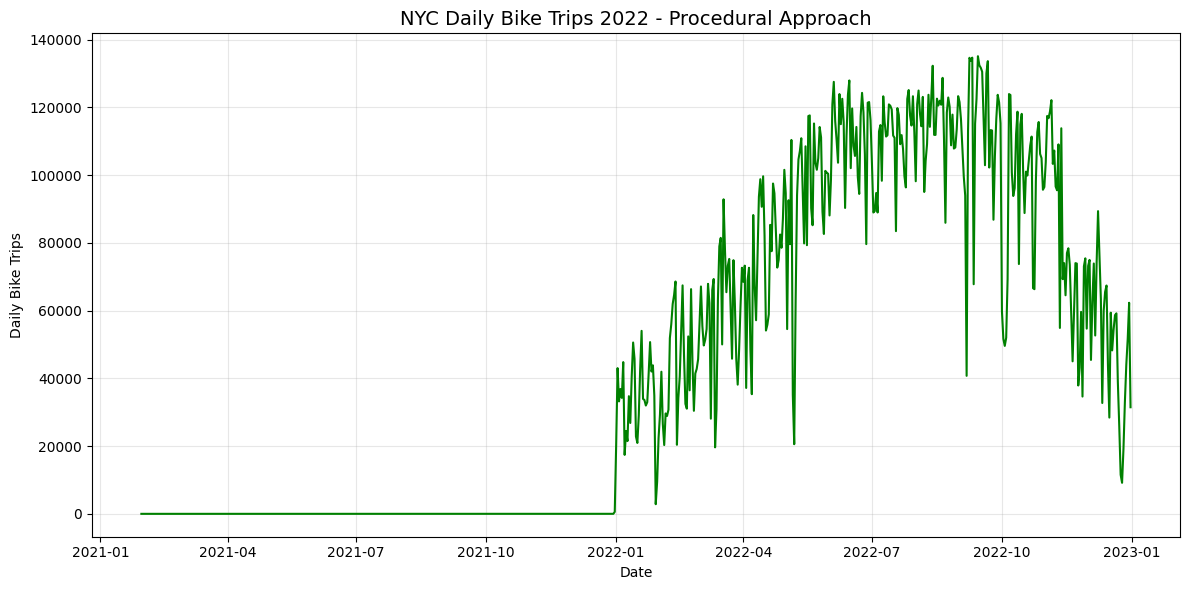

Procedural approach chart created using plt.plot() directly


In [5]:
# Demonstrate Procedural (Functional) Approach for comparison
print("Demonstrating Procedural/Functional Approach:")

plt.figure(figsize=(12, 6))
plt.title('NYC Daily Bike Trips 2022 - Procedural Approach', fontsize=14)
plt.plot(merged_data.index, merged_data['daily_trips'], color='green', linewidth=1.5)
plt.ylabel('Daily Bike Trips')
plt.xlabel('Date')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('NYC Daily Bike Trips 2022 - Procedural Approach')
plt.show()

print("Procedural approach chart created using plt.plot() directly")

## Step 5: Create Dual Axis Line Chart

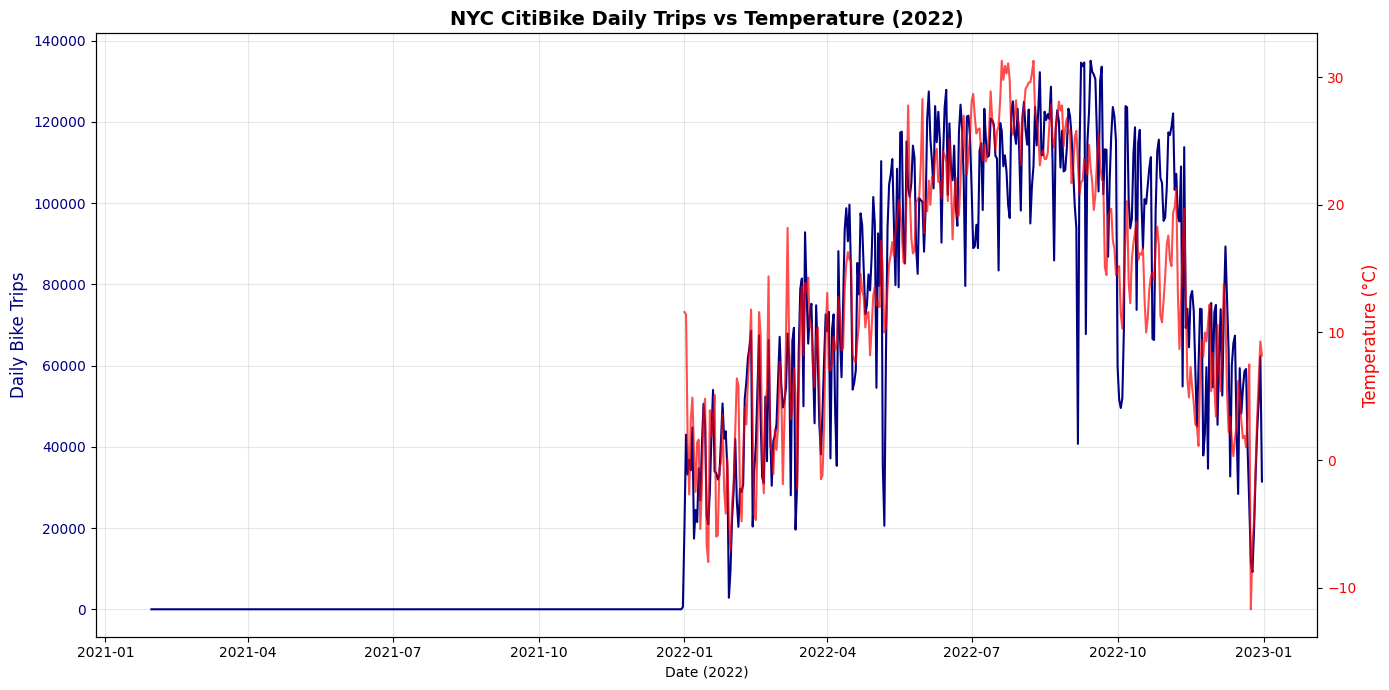

In [6]:
# Create a line chart of bike trip counts and temperatures on dual axis

# Using Object-Oriented approach for better control
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot bike trips on primary y-axis
color = 'navy'
ax1.set_xlabel('Date (2022)')
ax1.set_ylabel('Daily Bike Trips', color=color, fontsize=12)
ax1.plot(merged_data.index, merged_data['daily_trips'], color=color, linewidth=1.5, label='Daily Trips')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

# Create twin axis for temperature
ax2 = ax1.twinx()
color = 'red'
ax2.set_ylabel('Temperature (°C)', color=color, fontsize=12)
ax2.plot(merged_data.index, merged_data['avg_temp_c'], color=color, linewidth=1.5, alpha=0.7, label='Temperature')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
plt.title('NYC CitiBike Daily Trips vs Temperature (2022)', fontsize=14, fontweight='bold')
fig.tight_layout()
plt.savefig('NYC CitiBike Daily Trips vs Temperature (2022)')
plt.show()

## Matplotlib Implementation Explanation

### Both Paradigms Demonstrated:

**1. Procedural/Functional Approach (Used for simple plots)**
- **Method**: Direct `plt.plot()` calls with `plt.figure()`, `plt.title()`, etc.
- **Use Case**: Quick exploratory visualizations, simple charts
- **Advantages**: Concise code for basic plots
- **Limitations**: Limited customization, state management issues

**2. Object-Oriented Programming Approach (Used for complex plots)**
- **Method**: `fig, ax = plt.subplots()` with explicit axes objects
- **Use Case**: Production-quality visualizations, dual axes, subplots
- **Advantages**: Full control over plot elements, better customization, no state issues
- **Key Concepts Applied**:
  - **Figure Object**: Overall container (`fig`)
  - **Axes Objects**: Individual plots (`ax1`, `ax2`)
  - **Method Chaining**: `ax.set_ylabel()`, `ax.tick_params()`
  - **Dual Axes**: `ax2 = ax1.twinx()` for different scales

### Why OOP for Dual Axis?
- **Clear Separation**: Each axis handled independently
- **Scale Management**: Different y-axes for different units (trips vs temperature)
- **Professional Quality**: Production-ready visualizations
- **Maintainability**: Easier to modify and extend

### Code Structure for Dual Axis:
1. Create figure and primary axes using OOP
2. Plot bike trips on primary y-axis
3. Create twin axes for temperature data
4. Customize each axis independently
5. Apply final formatting and display

## Step 6: Histogram Curve

Trip duration analysis:
Total trips: 29,838,806
Filtered trips (1min-3hrs): 29,725,542
Average duration: 14.3 minutes


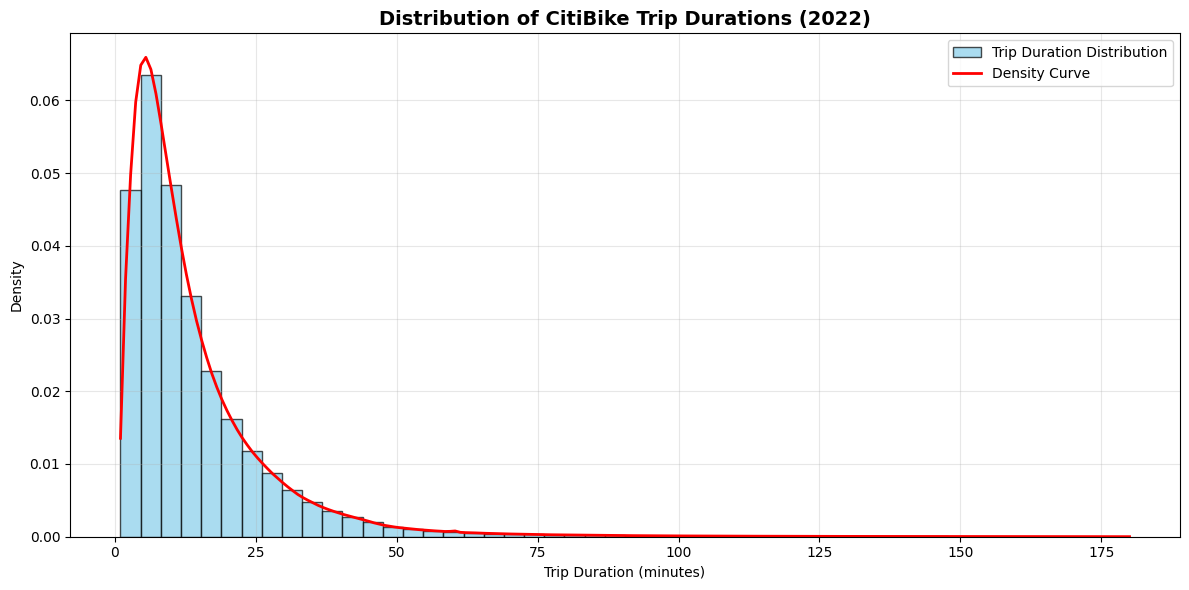

In [8]:
# Create histogram of trip duration with curve

# Convert trip duration to minutes and filter reasonable values
# Note: Assuming 'tripduration' column exists, if not we'll use time difference
if 'tripduration' in df.columns:
    duration_min = df['tripduration'] / 60
else:
    # Calculate duration from datetime columns
    df['started_at'] = pd.to_datetime(df['started_at'])
    df['ended_at'] = pd.to_datetime(df['ended_at'])
    duration_min = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Filter reasonable trip durations (1 minute to 3 hours)
duration_filtered = duration_min[(duration_min >= 1) & (duration_min <= 180)]

print(f"Trip duration analysis:")
print(f"Total trips: {len(duration_min):,}")
print(f"Filtered trips (1min-3hrs): {len(duration_filtered):,}")
print(f"Average duration: {duration_filtered.mean():.1f} minutes")

# Create histogram with curve
fig, ax = plt.subplots(figsize=(12, 6))

# Histogram
n, bins, patches = ax.hist(duration_filtered, bins=50, alpha=0.7, 
                          color='skyblue', edgecolor='black', 
                          density=True, label='Trip Duration Distribution')

# Add curve (kernel density estimate)
from scipy.stats import gaussian_kde
kde = gaussian_kde(duration_filtered)
x_vals = np.linspace(duration_filtered.min(), duration_filtered.max(), 200)
ax.plot(x_vals, kde(x_vals), color='red', linewidth=2, label='Density Curve')

# Customization
ax.set_xlabel('Trip Duration (minutes)')
ax.set_ylabel('Density')
ax.set_title('Distribution of CitiBike Trip Durations (2022)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('Distribution of CitiBike Trip Durations (2022)')
plt.show()

## Step 7: Multi-plot Figure (Bar and Pie Charts)

User type distribution:
member_casual
member    23257785
casual     6581021
Name: count, dtype: int64

Gender distribution:
Unknown    29838806
dtype: int64


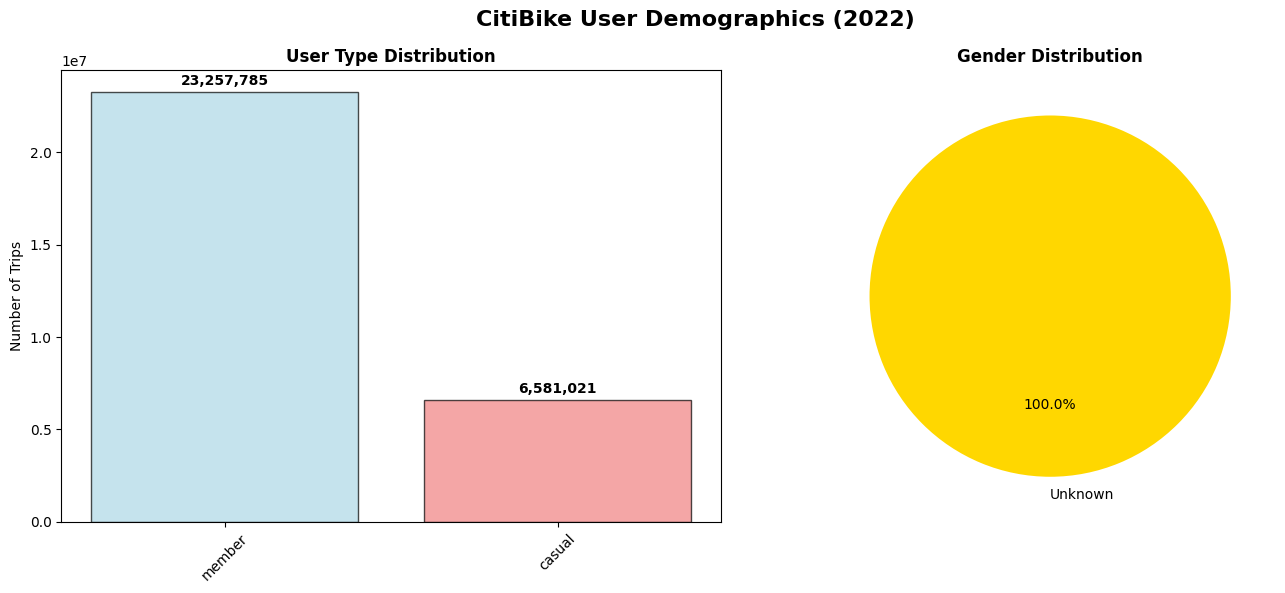

In [9]:
# Create figure with two axes - bar chart and pie chart

# Prepare data
user_type_counts = df['member_casual'].value_counts()
gender_counts = df['gender'].value_counts() if 'gender' in df.columns else pd.Series({'Unknown': len(df)})

print("User type distribution:")
print(user_type_counts)
print("\nGender distribution:")
print(gender_counts)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart - User types
colors_bar = ['lightblue', 'lightcoral']
ax1.bar(user_type_counts.index, user_type_counts.values, color=colors_bar, alpha=0.7, edgecolor='black')
ax1.set_title('User Type Distribution', fontweight='bold')
ax1.set_ylabel('Number of Trips')
ax1.tick_params(axis='x', rotation=45)

# Add value labels on bars
for i, v in enumerate(user_type_counts.values):
    ax1.text(i, v + max(user_type_counts.values)*0.01, f'{v:,}', 
             ha='center', va='bottom', fontweight='bold')

# Pie chart - Gender distribution
colors_pie = ['gold', 'lightcoral', 'lightblue', 'lightgreen']
ax2.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%',
        colors=colors_pie[:len(gender_counts)], startangle=90)
ax2.set_title('Gender Distribution', fontweight='bold')

# Overall title
plt.suptitle('CitiBike User Demographics (2022)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('CitiBike User Demographics (2022)')
plt.show()